In [1]:
!pip install chart_studio

In [2]:
!pip install cufflinks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_excel("Data_Train.xlsx")

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
!pip install pandas-profiling

In [7]:
import pandas_profiling as pf

In [8]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

Let's convert Dae_of_Journey to its appropriate format as datetime with regards to day and month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

### Depature Time

In [14]:
## Dep Time
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [15]:
#Drop dep time
df.drop(labels = ['Dep_Time'], axis = 1, inplace = True)

### Arrival Time

In [16]:
#Arrival_Time
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
#drop arrival time
df.drop(labels = ['Arrival_Time'], axis = 1, inplace = True)

### Duration Time

In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [19]:
duration = df['Duration'].str.split(' ', expand = True) #split duration datapoints
duration[1].fillna('00m', inplace = True) #fill all "NAN" with '00m'
df['duration_hr'] = duration[0].apply(lambda x: x[: -1])
df['duration_min'] = duration[1].apply(lambda x: x[: -1])

In [20]:
df['duration_hr']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [21]:
#drop duration
df.drop(['Duration'], axis = 1, inplace = True)

In [22]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


# Visualization

## Count of Airlines


In [23]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price


In [24]:
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending = False)
Airprices

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

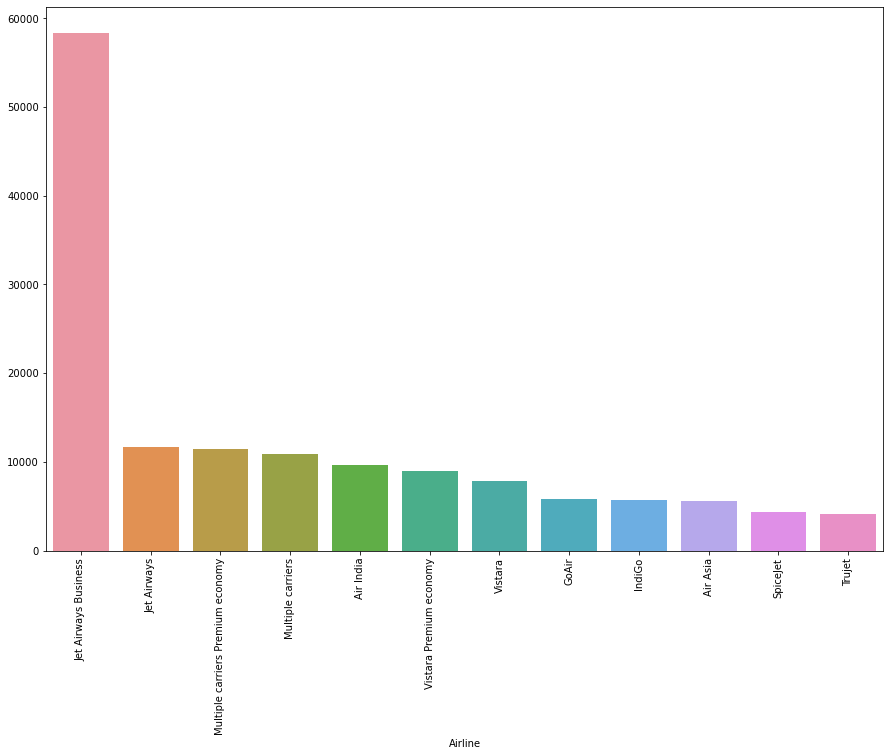

In [25]:
plt.figure(figsize = (15, 10))
sns.barplot(x = Airprices.index, y = Airprices.values)
plt.xticks(rotation = 90)
plt.show()


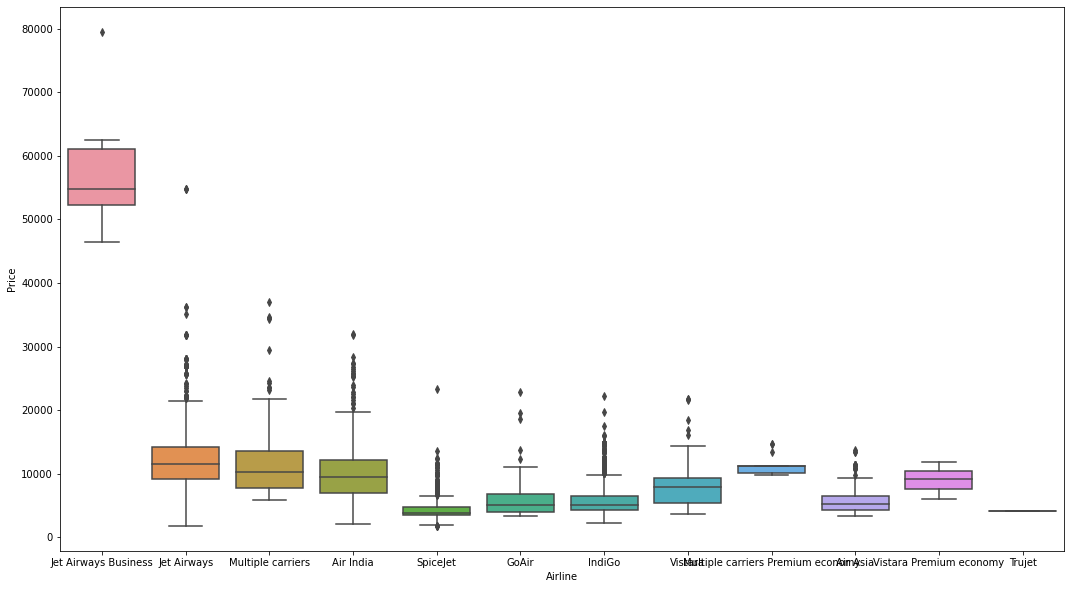

In [26]:
plt.figure(figsize = (18, 10))
sns.boxplot(x = 'Airline', y = 'Price', data = df.sort_values('Price', ascending = False))
plt.show()


In [27]:
## Price based on number of stops
df.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

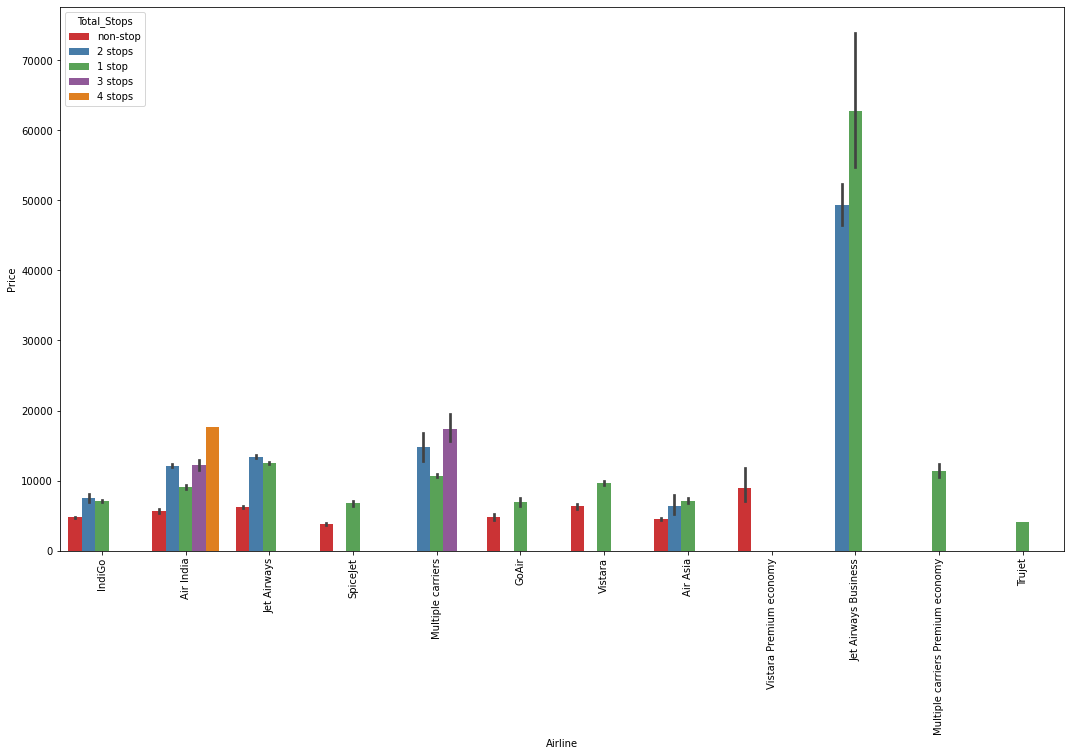

In [28]:
plt.figure(figsize = (18, 10))
ax = sns.barplot(x = df['Airline'], y = df['Price'], hue = df['Total_Stops'], palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:xlabel='Source', ylabel='Price'>

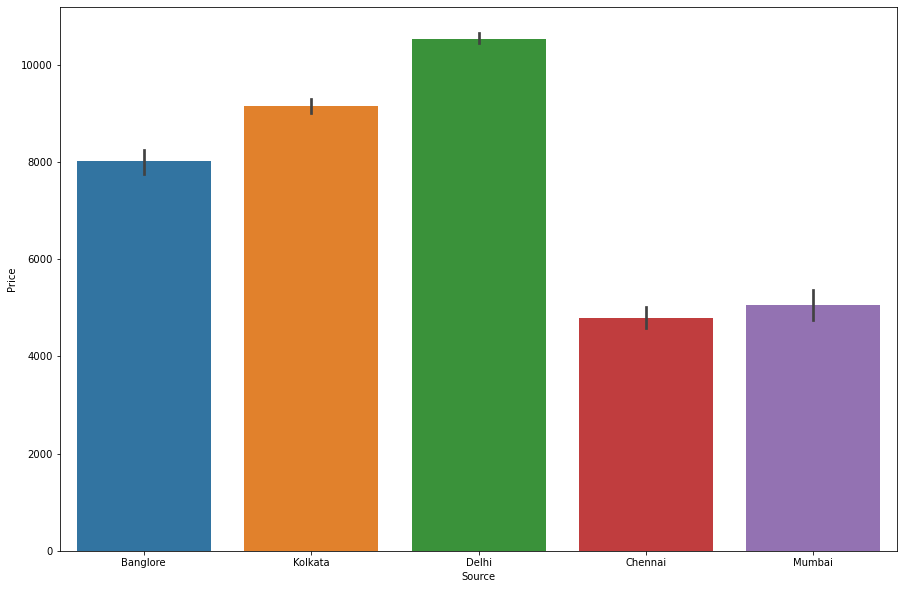

In [29]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Source', y = 'Price', data = df)

### Destination vs Price


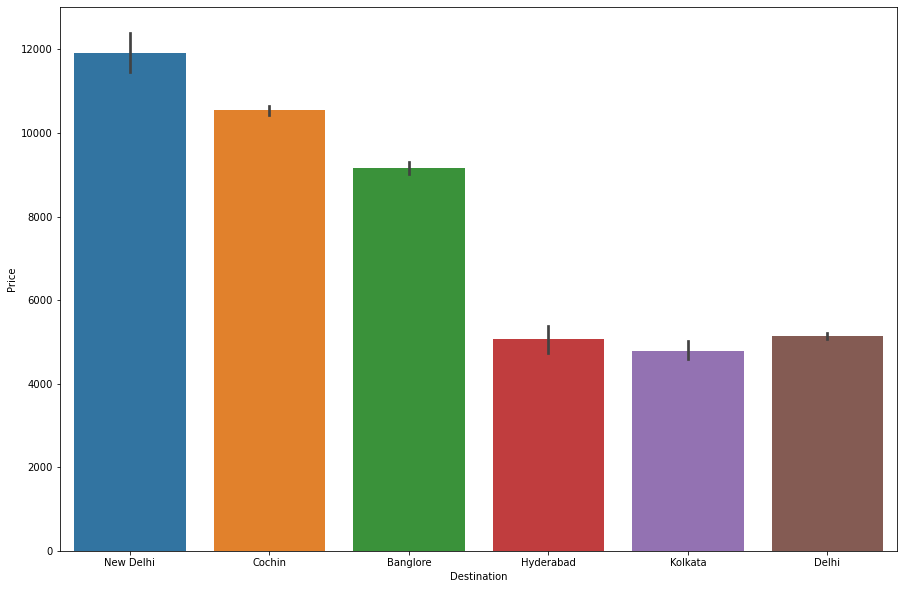

In [30]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Destination', y = 'Price', data = df.sort_values('Price', ascending = False))
plt.show()

In [31]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [32]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
#New dehli is same as dehli
for i in df:
    df.replace('New Delhi', 'Delhi', inplace = True)

In [34]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

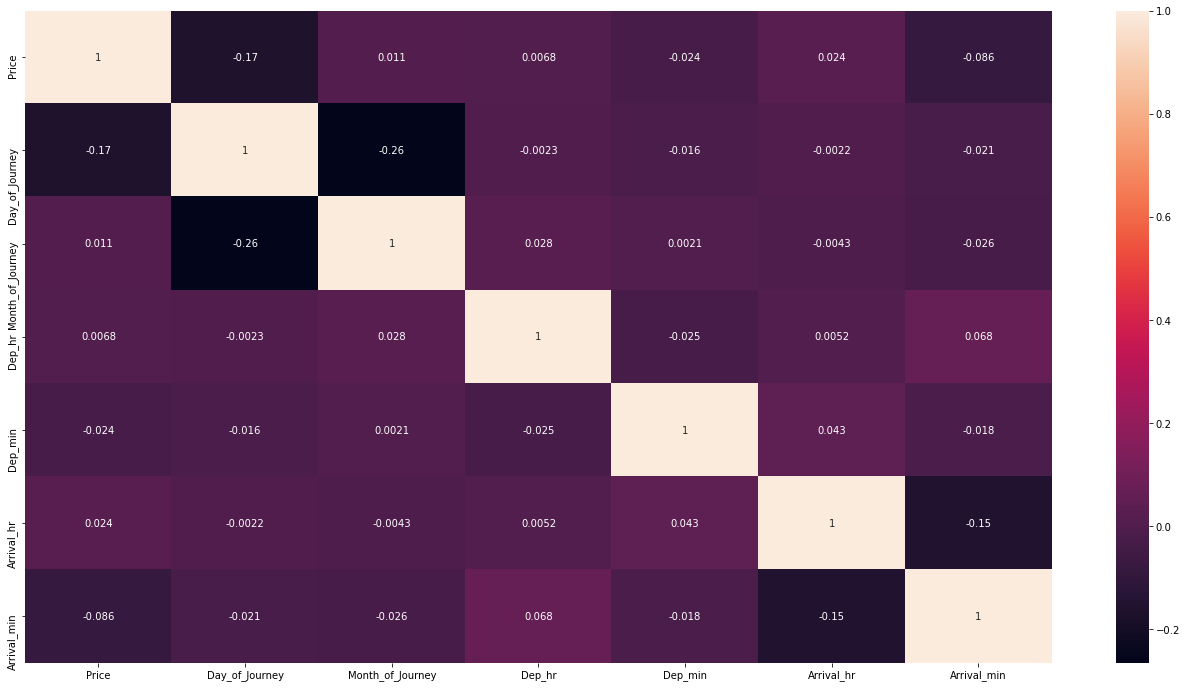

In [35]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

# Apply one-hot encoding

In [36]:
#Handling Categoircal values
df['Total_Stops']=df['Total_Stops'].map({'non-stop': 0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops' :4})

In [37]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [38]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)

In [39]:
source_dest_dummy = pd.get_dummies(df[['Source', 'Destination']], drop_first = True)
source_dest_dummy

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [40]:
df = pd.concat([air_dummy, source_dest_dummy, df], axis = 1)

In [41]:
df.drop(['Airline', 'Source', 'Destination'], inplace = True, axis = 1)

In [42]:
df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,No info,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,No info,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,No info,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,No info,12648,3,1,11,30,14,10,2,40


In [43]:
df.shape

(10682, 32)

In [44]:
df.columns.tolist()

['Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Date_of_Journey',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_hr',
 'Dep_min',
 'Arrival_hr',
 'Arrival_min',
 'duration_hr',
 'duration_min']

# Data Test

In [45]:
df_test=pd.read_excel("Test_set.xlsx")

In [46]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month
#Dep_time
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
#Splitting duration time
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['duration_hr']=a[0].apply(lambda x: x[:1])
df_test['duration_min']=a[1].apply(lambda x: x[:1])
#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)
#Handling Categorical Values
df_test['Total_Stops']=df_test['Total_Stops'].map({'nonstop':
0, '2 stops':2, '1 stop':1, '3 stops':3,
'4 stops':4})
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [48]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [49]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 32)
test_shape (2671, 28)


In [50]:
x=df.drop(['Route', 'Price','Additional_Info', 'Date_of_Journey'],axis=1)
y=df['Price']

In [51]:
x.shape

(10682, 28)

In [52]:
x.columns.tolist()

['Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Total_Stops',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_hr',
 'Dep_min',
 'Arrival_hr',
 'Arrival_min',
 'duration_hr',
 'duration_min']

In [53]:
df_test.columns.tolist()

['Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Total_Stops',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_hr',
 'Dep_min',
 'Arrival_hr',
 'Arrival_min',
 'duration_hr',
 'duration_min']

In [54]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


# Model Building

## Splitting the data

In [68]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [69]:
#Preparing Extra Tree Regression
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.768743766095223

<AxesSubplot:>

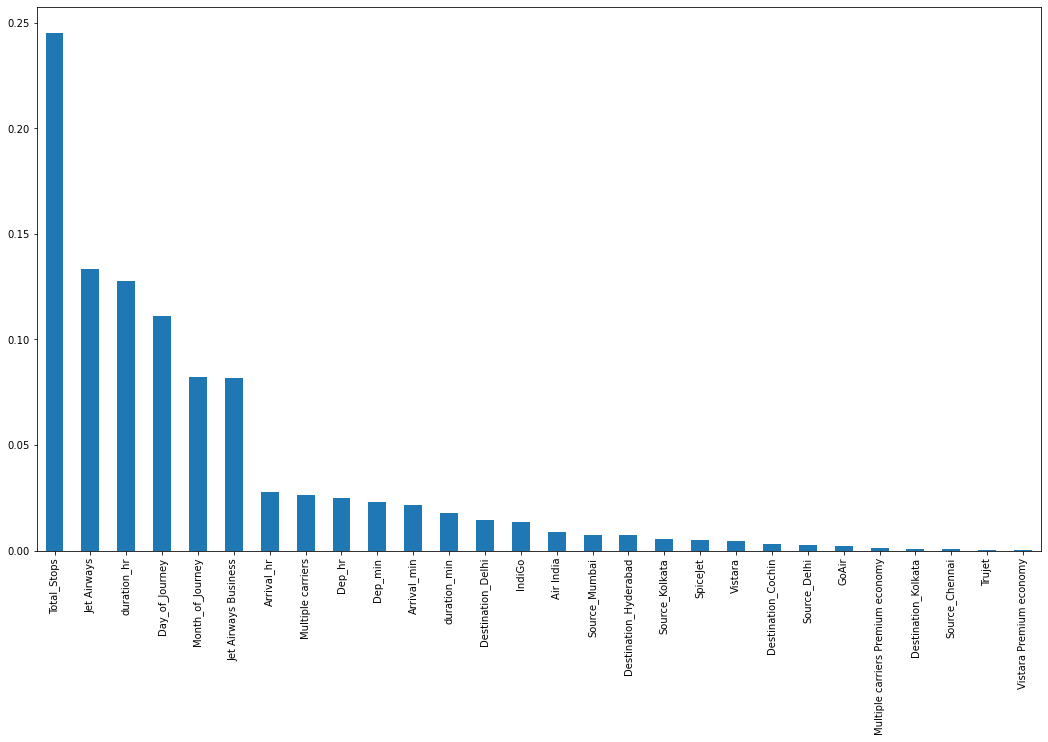

In [70]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',
figsize=(18,10))

In [72]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor()
RF_Model.fit(X_train, y_train)
y_predict = RF_Model.predict(X_test)
r2_score(y_test, y_predict)

0.7990880959389035

### Hyperparameter



In [77]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
# create random grid
rand_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}


rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)



In [78]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [79]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12605.45846898,  4293.61496324,  6139.01693076, ...,
       11657.35839282,  9813.50246678,  8649.45355343])

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1155.6390941434493
MSE 3960477.149696552


In [81]:
r2_score(y_test,rf_pred)

0.8071228327814128

In [82]:
!pip install catboost

In [83]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train, y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 149ms	remaining: 2m 29s
1:	learn: 4317.7245126	total: 152ms	remaining: 1m 15s
2:	learn: 4167.9871081	total: 154ms	remaining: 51.1s
3:	learn: 4030.4839609	total: 156ms	remaining: 38.8s
4:	learn: 3906.4844760	total: 158ms	remaining: 31.5s
5:	learn: 3785.4580402	total: 160ms	remaining: 26.5s
6:	learn: 3673.8662552	total: 162ms	remaining: 22.9s
7:	learn: 3582.0533069	total: 163ms	remaining: 20.2s
8:	learn: 3495.5629367	total: 165ms	remaining: 18.2s
9:	learn: 3404.7478335	total: 168ms	remaining: 16.6s
10:	learn: 3325.1004431	total: 170ms	remaining: 15.3s
11:	learn: 3254.1004651	total: 172ms	remaining: 14.2s
12:	learn: 3184.6084064	total: 174ms	remaining: 13.2s
13:	learn: 3122.3064005	total: 177ms	remaining: 12.5s
14:	learn: 3067.6550706	total: 179ms	remaining: 11.8s
15:	learn: 3014.5169632	total: 182ms	remaining: 11.2s
16:	learn: 2962.4252595	total: 184ms	remaining: 10.7s
17:	learn: 2920.1931240	total: 186ms	remaining: 10.2s
18:	le

220:	learn: 1850.7403740	total: 503ms	remaining: 1.77s
221:	learn: 1850.4713084	total: 504ms	remaining: 1.77s
222:	learn: 1849.4055094	total: 506ms	remaining: 1.76s
223:	learn: 1847.9288404	total: 507ms	remaining: 1.76s
224:	learn: 1847.2381811	total: 509ms	remaining: 1.75s
225:	learn: 1847.0286416	total: 510ms	remaining: 1.75s
226:	learn: 1845.0009660	total: 512ms	remaining: 1.74s
227:	learn: 1843.8117526	total: 514ms	remaining: 1.74s
228:	learn: 1842.1997498	total: 515ms	remaining: 1.73s
229:	learn: 1842.0481530	total: 517ms	remaining: 1.73s
230:	learn: 1838.9875108	total: 518ms	remaining: 1.73s
231:	learn: 1838.6110226	total: 520ms	remaining: 1.72s
232:	learn: 1838.5035448	total: 521ms	remaining: 1.71s
233:	learn: 1838.3418898	total: 522ms	remaining: 1.71s
234:	learn: 1838.2935627	total: 524ms	remaining: 1.7s
235:	learn: 1836.0108776	total: 525ms	remaining: 1.7s
236:	learn: 1835.3309100	total: 527ms	remaining: 1.7s
237:	learn: 1835.2070778	total: 529ms	remaining: 1.69s
238:	learn: 1

438:	learn: 1646.1877825	total: 847ms	remaining: 1.08s
439:	learn: 1645.6065801	total: 849ms	remaining: 1.08s
440:	learn: 1645.5965036	total: 851ms	remaining: 1.08s
441:	learn: 1644.9139282	total: 852ms	remaining: 1.07s
442:	learn: 1644.3556189	total: 854ms	remaining: 1.07s
443:	learn: 1642.8566374	total: 855ms	remaining: 1.07s
444:	learn: 1641.8977234	total: 857ms	remaining: 1.07s
445:	learn: 1640.8293383	total: 859ms	remaining: 1.07s
446:	learn: 1640.0284111	total: 862ms	remaining: 1.07s
447:	learn: 1639.3132156	total: 864ms	remaining: 1.06s
448:	learn: 1638.4922836	total: 865ms	remaining: 1.06s
449:	learn: 1637.4337962	total: 867ms	remaining: 1.06s
450:	learn: 1636.7014453	total: 869ms	remaining: 1.06s
451:	learn: 1636.6511828	total: 871ms	remaining: 1.06s
452:	learn: 1635.6233911	total: 873ms	remaining: 1.05s
453:	learn: 1634.8711916	total: 875ms	remaining: 1.05s
454:	learn: 1634.3861321	total: 877ms	remaining: 1.05s
455:	learn: 1633.8159915	total: 879ms	remaining: 1.05s
456:	learn

623:	learn: 1536.7094272	total: 1.19s	remaining: 715ms
624:	learn: 1536.3869153	total: 1.19s	remaining: 713ms
625:	learn: 1536.3574037	total: 1.19s	remaining: 711ms
626:	learn: 1535.8215118	total: 1.19s	remaining: 709ms
627:	learn: 1535.2411121	total: 1.19s	remaining: 707ms
628:	learn: 1535.2380104	total: 1.19s	remaining: 704ms
629:	learn: 1534.6060462	total: 1.2s	remaining: 702ms
630:	learn: 1534.1998505	total: 1.2s	remaining: 701ms
631:	learn: 1533.6898229	total: 1.2s	remaining: 699ms
632:	learn: 1533.0626316	total: 1.2s	remaining: 697ms
633:	learn: 1532.5284708	total: 1.2s	remaining: 695ms
634:	learn: 1531.9967798	total: 1.21s	remaining: 693ms
635:	learn: 1531.7112832	total: 1.21s	remaining: 691ms
636:	learn: 1531.3901547	total: 1.21s	remaining: 689ms
637:	learn: 1530.7413788	total: 1.21s	remaining: 687ms
638:	learn: 1530.1317663	total: 1.21s	remaining: 685ms
639:	learn: 1529.6674057	total: 1.21s	remaining: 683ms
640:	learn: 1529.5797087	total: 1.22s	remaining: 681ms
641:	learn: 152

809:	learn: 1461.4781258	total: 1.52s	remaining: 358ms
810:	learn: 1461.1209006	total: 1.53s	remaining: 356ms
811:	learn: 1460.7002941	total: 1.53s	remaining: 354ms
812:	learn: 1460.3450874	total: 1.53s	remaining: 352ms
813:	learn: 1459.8216877	total: 1.53s	remaining: 350ms
814:	learn: 1459.2279638	total: 1.53s	remaining: 348ms
815:	learn: 1458.8274393	total: 1.54s	remaining: 346ms
816:	learn: 1458.6059761	total: 1.54s	remaining: 344ms
817:	learn: 1458.6040278	total: 1.54s	remaining: 342ms
818:	learn: 1458.6003278	total: 1.54s	remaining: 341ms
819:	learn: 1457.5833269	total: 1.54s	remaining: 339ms
820:	learn: 1457.3004243	total: 1.54s	remaining: 337ms
821:	learn: 1456.8507487	total: 1.55s	remaining: 335ms
822:	learn: 1456.3956979	total: 1.55s	remaining: 333ms
823:	learn: 1455.6548069	total: 1.55s	remaining: 331ms
824:	learn: 1455.1132909	total: 1.55s	remaining: 329ms
825:	learn: 1454.7832722	total: 1.55s	remaining: 327ms
826:	learn: 1454.3364815	total: 1.56s	remaining: 326ms
827:	learn

In [84]:
cat_pred = cat.predict(X_test)


In [85]:
r2_score(y_test, cat_pred)

0.8273858089678572

In [89]:
import pickle

pickle.dump(cat, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

In [91]:
df.columns.tolist()

['Air India',
 'GoAir',
 'IndiGo',
 'Jet Airways',
 'Jet Airways Business',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Date_of_Journey',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_hr',
 'Dep_min',
 'Arrival_hr',
 'Arrival_min',
 'duration_hr',
 'duration_min']

In [94]:
deploy_df = df.drop(['Route', 'Additional_Info', 'Date_of_Journey'], axis = 1)

In [96]:
deploy_df.to_csv('deploy_df.csv')